In [84]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
#Import dataset
data_df=pd.read_csv('winequality-red.csv')

In [86]:
#descriptive statistics summary
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [87]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
#set up prediction group
pred_test = data_df.iloc[2]
pred_test.drop(['quality', 'total sulfur dioxide'], inplace=True)
pred_test

fixed acidity           7.800
volatile acidity        0.760
citric acid             0.040
residual sugar          2.300
chlorides               0.092
free sulfur dioxide    15.000
density                 0.997
pH                      3.260
sulphates               0.650
alcohol                 9.800
Name: 2, dtype: float64

In [89]:
#DATA CLEANING
#finding missing data
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [90]:

data_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

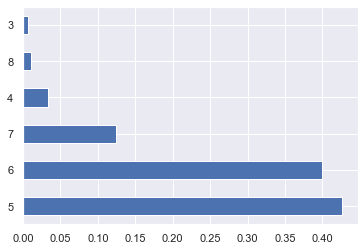

In [91]:
#Frequency of each rating 
data_df.quality.value_counts(normalize=True).plot.barh()
plt.show()

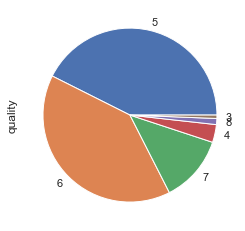

In [92]:
data_df.quality.value_counts(normalize=True).plot.pie()
plt.show()

<AxesSubplot:>

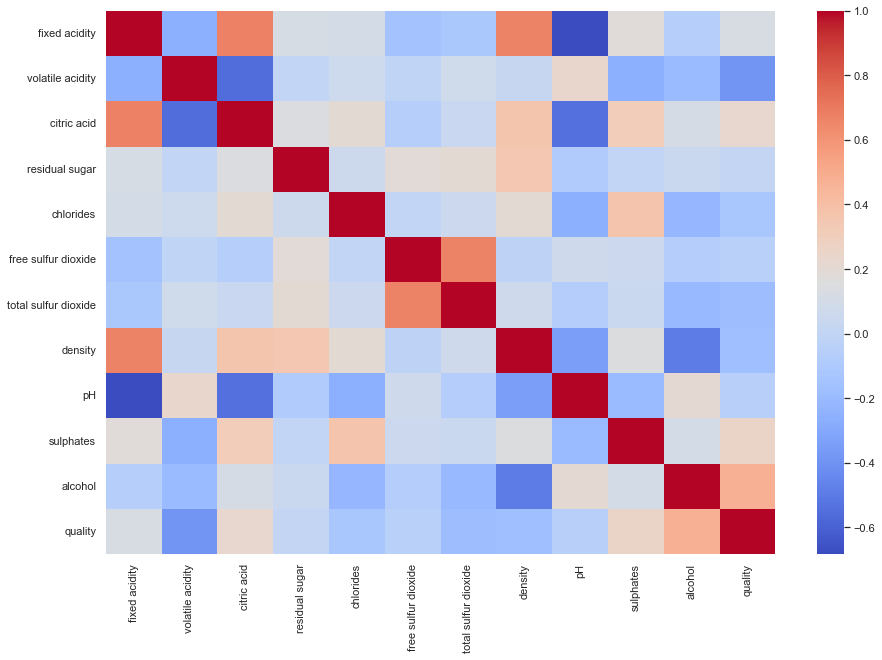

In [93]:
#Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), cmap='coolwarm')

In [94]:
data_df_new = data_df.drop('total sulfur dioxide', axis=1)
data_df_ml = pd.get_dummies(data_df_new, drop_first=True)
data_df_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


In [95]:
#Define variables and encode quality 
x=data_df_ml.drop(['quality'], axis=1)
y=data_df['quality'].apply(lambda y: 1 if y>6 else 0)

In [96]:
print(x)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [97]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)

x_standard

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [99]:
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [100]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [101]:
# Logistic Regession model
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

y_pred = LogReg.predict(x_test)

In [102]:
#Predicting the quality 
y_pred_test_output = LogReg.predict(pred_test_std)
y_pred_test_output
#poor

array([0])

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

# the model is highly accurate 

0.8916666666666667

In [104]:
print(classification_report(y_test, y_pred))

# Precision - what percent of predictions were correct 
# The model predicted poor/0 scores with 92% precision, while it predection good/1 scores with 47% precision


# Recall - the percent of positve instances found 
# There were 28% of positive instances of good/1 scores while it predicted 96% postitive instances of poor/0 scores.

# F-1 score - harmonic mean between precision and recall
# 94% of poor/0 score predictions were correct, while 35% of good/1 predictions were correct

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       430
           1       0.47      0.28      0.35        50

    accuracy                           0.89       480
   macro avg       0.69      0.62      0.65       480
weighted avg       0.87      0.89      0.88       480



Text(0.5, 257.44, 'Predicted label')

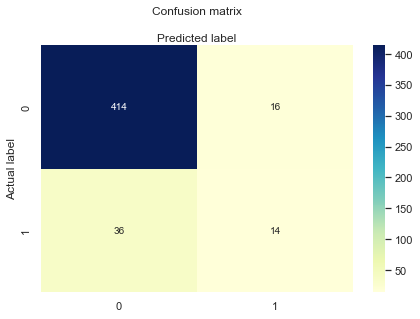

In [105]:
# Confusion matrix - tells us where errors in the model were made 
conf_mat = confusion_matrix(y_test, y_pred)
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# The model accuraelty predcited 414 of the poor/0 scores while confusing 16 for a good/1 score.
# The model confused 26 good/1 scores for poor/0 scores and accurately 14 of them. 
# Maybe due to unbalanced dataset ()

In [106]:
#Cohen Kappa Score - measure performance of machine learning classification model with unbalanced data 
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

#fair agreement 

0.29491525423728815

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [108]:
accuracy_score(y_test, rfc_pred)

# this model is more accurate than the Logistic Regression model 

0.9270833333333334

In [109]:
rfc.feature_importances_

array([0.07945322, 0.12773651, 0.10096476, 0.07273723, 0.07611325,
       0.06601224, 0.09376206, 0.06481575, 0.13300283, 0.18540214])

<AxesSubplot:>

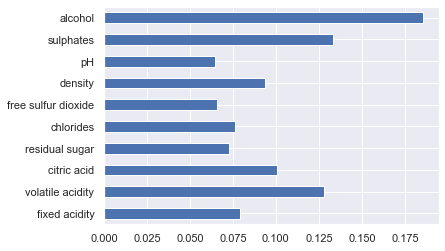

In [110]:
pd.Series(rfc.feature_importances_, index=data_df_ml.drop('quality', axis=1).columns).plot(kind='barh')

# Alcohol and Density are the most importatnt features to Quality 

Text(0.5, 1.0, 'Actual vs. Predicted')

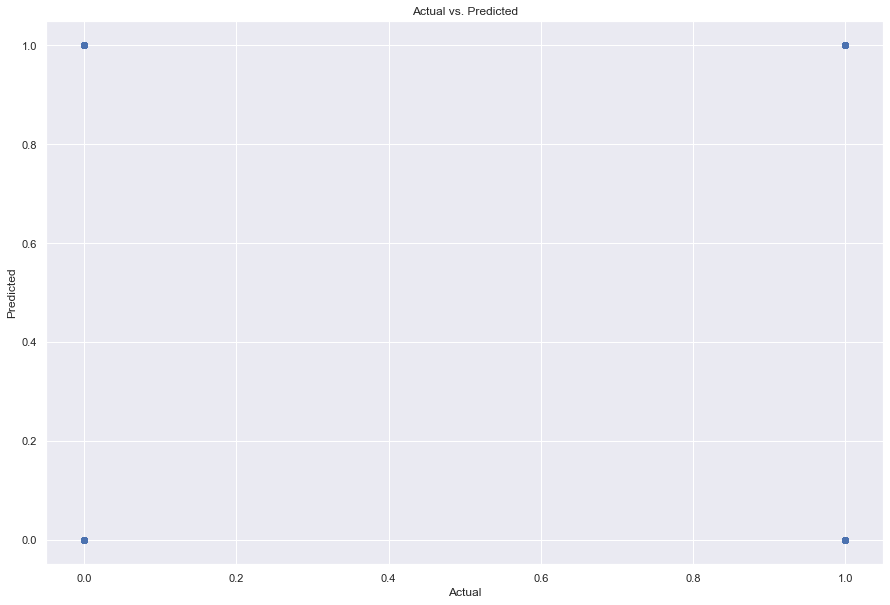

In [111]:
#scatterplot
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [112]:
#predicted values 
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
1109,0,0,0
1032,0,0,0
1002,1,1,0
487,0,0,0
979,0,0,0
1054,0,0,0
542,0,0,0
853,0,0,0
1189,0,0,0
412,0,0,0


In [113]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='citric acid', ylabel='quality'>

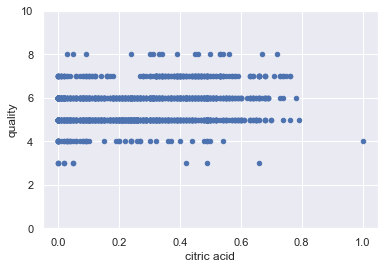

In [114]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'citric acid'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))

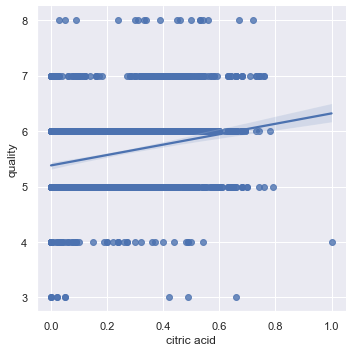

In [115]:
sns.lmplot(x='citric acid', y='quality', data=data_df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

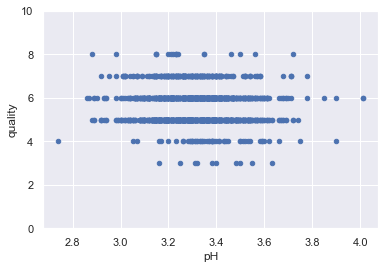

In [116]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'pH'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))


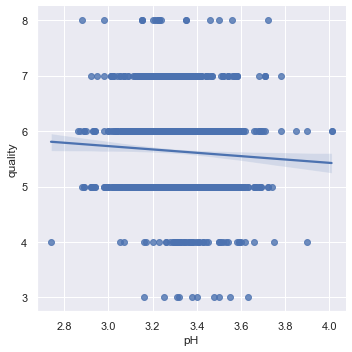

In [117]:
sns.lmplot(x='pH', y='quality', data=data_df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

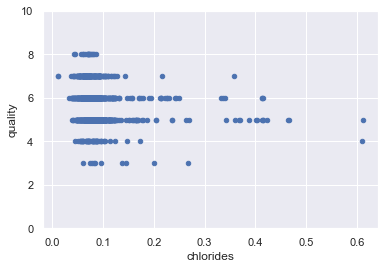

In [118]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'chlorides'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))


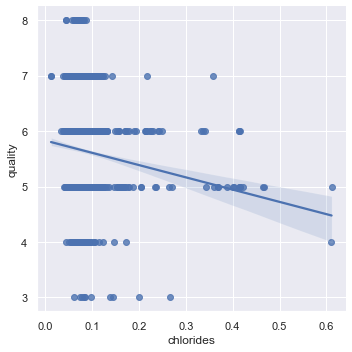

In [119]:
sns.lmplot(x='chlorides', y='quality', data=data_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

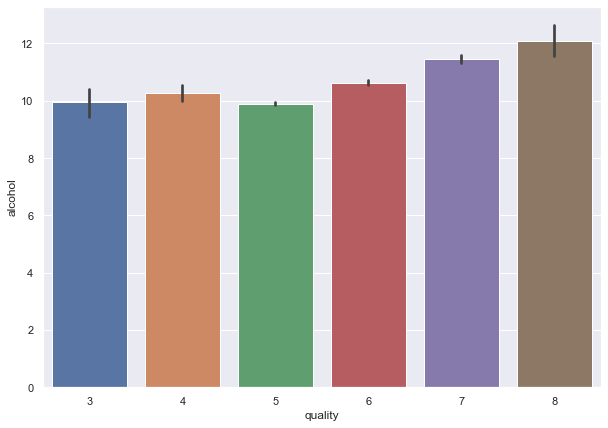

In [120]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='alcohol', data=data_df)

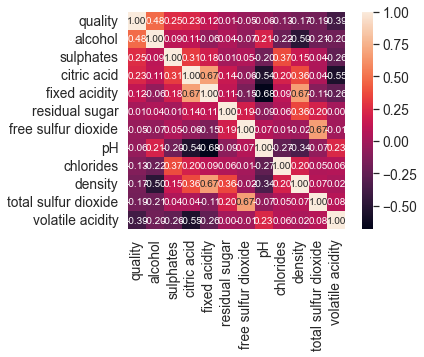

In [121]:
#multivariate analysis
#Data visualization 
#Building correlation matrix

# Which factor has the highest relationship to the quality

k = 12 # number of variables for heatmap
corrmat = data_df.corr()
cols = corrmat.nlargest(k,'quality')['quality'].index
cm = np.corrcoef(data_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10 }, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

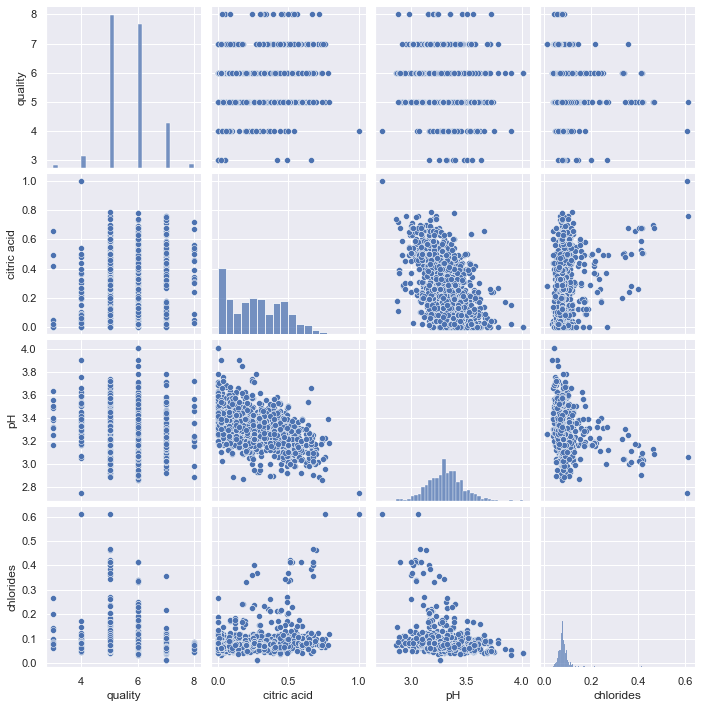

In [122]:
sns.set()
cols = ['quality', 'citric acid', 'pH', 'chlorides']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()

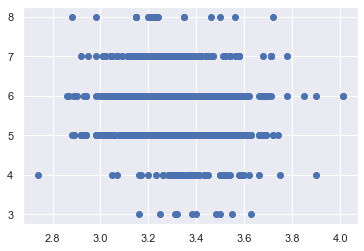

In [123]:
plt.scatter(data_df.pH, data_df.quality)
plt.show()

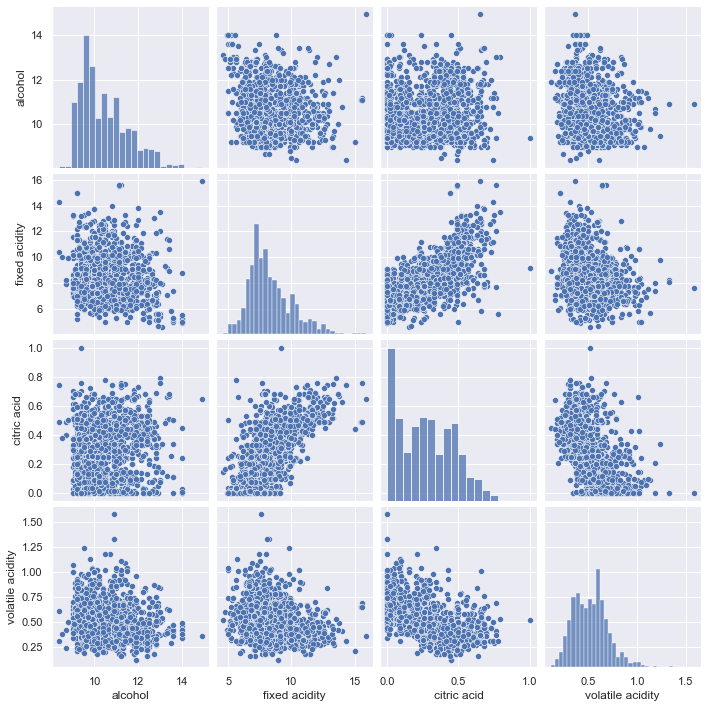

In [124]:
# Does a red wines acidity levels (fixed, volatile, citrus) 
# compromise the alcohol content percentage? 

sns.set()
cols = ['alcohol', 'fixed acidity', 'citric acid', 'volatile acidity']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()

# No correlation 


In [125]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

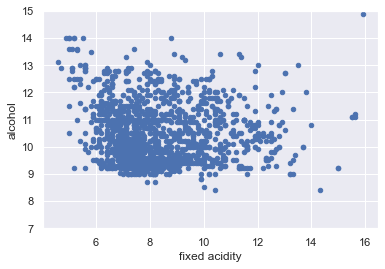

In [126]:
# Does a red wines acidity levels (fixed, volatile, citrus) 
# compromise the alcohol content percentage? 
var = 'fixed acidity'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

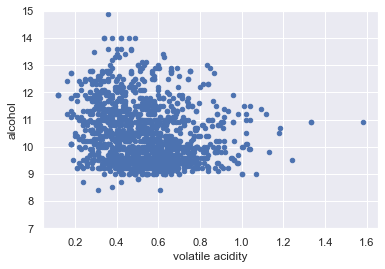

In [127]:
var = 'volatile acidity'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>

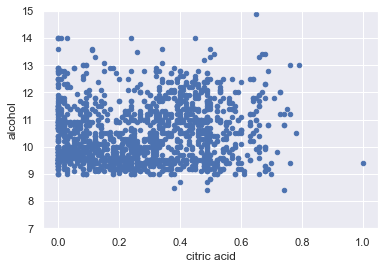

In [128]:
var = 'citric acid'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

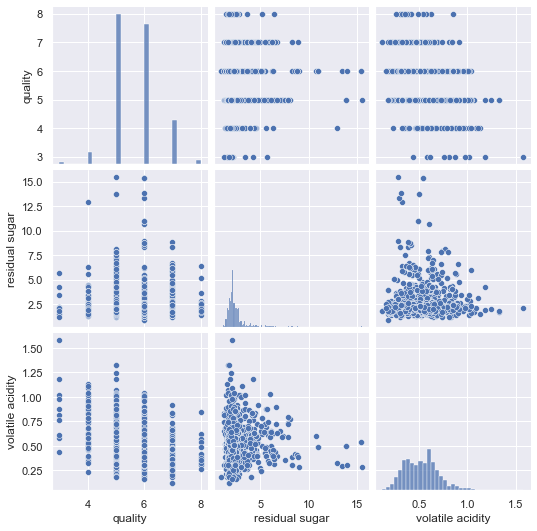

In [129]:
# For wines with high amounts of volatile acid,
#  can the introduction of high levels of sugar 
# still contribute to a high quality rating?

sns.set()
cols = ['quality', 'residual sugar', 'volatile acidity']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()

# High VA --> Low sugar
# Higher quality in wines with VA 0.2 and 1
# Same VA levels correlate to low-to-average residual sugar 
# Since higher amounts of sugar also do not correlate to high quality ratings
# More sugar will not make a higher rating for a wine with high VA 

